# Perceptron

In [1]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt('perceptron_toydata.txt')
print(data)

[[ 0.77 -1.14  0.  ]
 [-0.33  1.44  0.  ]
 [ 0.91 -3.07  0.  ]
 [-0.37 -1.91  0.  ]
 [-1.84 -1.13  0.  ]
 [-1.5   0.34  0.  ]
 [-0.63 -1.53  0.  ]
 [-1.08 -1.23  0.  ]
 [ 0.39 -1.99  0.  ]
 [-1.26 -2.9   0.  ]
 [-5.27 -0.78  0.  ]
 [-0.49 -2.74  0.  ]
 [ 1.48 -3.74  0.  ]
 [-1.64 -1.96  0.  ]
 [ 0.45  0.36  0.  ]
 [-1.48 -1.17  0.  ]
 [-2.94 -4.47  0.  ]
 [-2.19 -1.48  0.  ]
 [ 0.02 -0.02  0.  ]
 [-2.24 -2.12  0.  ]
 [-3.17 -3.69  0.  ]
 [-4.09  1.03  0.  ]
 [-2.41 -2.31  0.  ]
 [-3.45 -0.61  0.  ]
 [-3.96 -2.    0.  ]
 [-2.95 -1.16  0.  ]
 [-2.42 -3.35  0.  ]
 [-1.74 -1.1   0.  ]
 [-1.61 -1.28  0.  ]
 [-2.59 -2.21  0.  ]
 [-2.64 -2.2   0.  ]
 [-2.84 -4.12  0.  ]
 [-1.45 -2.26  0.  ]
 [-3.98 -1.05  0.  ]
 [-2.97 -1.63  0.  ]
 [-0.68 -1.52  0.  ]
 [-0.1  -3.43  0.  ]
 [-1.14 -2.66  0.  ]
 [-2.92 -2.51  0.  ]
 [-2.14 -1.62  0.  ]
 [-3.33 -0.44  0.  ]
 [-1.05 -3.85  0.  ]
 [ 0.38  0.95  0.  ]
 [-0.05 -1.95  0.  ]
 [-3.2  -0.22  0.  ]
 [-2.26  0.01  0.  ]
 [-1.41 -0.33  0.  ]
 [-1.2  -0.71

In [4]:
X, Y = data[:, :2], data[:, 2]
X = np.insert(X, obj=0, values=1, axis=1)
Y = (Y - 0.5) * 2

print(X)
print(Y)

[[ 1.    0.77 -1.14]
 [ 1.   -0.33  1.44]
 [ 1.    0.91 -3.07]
 [ 1.   -0.37 -1.91]
 [ 1.   -1.84 -1.13]
 [ 1.   -1.5   0.34]
 [ 1.   -0.63 -1.53]
 [ 1.   -1.08 -1.23]
 [ 1.    0.39 -1.99]
 [ 1.   -1.26 -2.9 ]
 [ 1.   -5.27 -0.78]
 [ 1.   -0.49 -2.74]
 [ 1.    1.48 -3.74]
 [ 1.   -1.64 -1.96]
 [ 1.    0.45  0.36]
 [ 1.   -1.48 -1.17]
 [ 1.   -2.94 -4.47]
 [ 1.   -2.19 -1.48]
 [ 1.    0.02 -0.02]
 [ 1.   -2.24 -2.12]
 [ 1.   -3.17 -3.69]
 [ 1.   -4.09  1.03]
 [ 1.   -2.41 -2.31]
 [ 1.   -3.45 -0.61]
 [ 1.   -3.96 -2.  ]
 [ 1.   -2.95 -1.16]
 [ 1.   -2.42 -3.35]
 [ 1.   -1.74 -1.1 ]
 [ 1.   -1.61 -1.28]
 [ 1.   -2.59 -2.21]
 [ 1.   -2.64 -2.2 ]
 [ 1.   -2.84 -4.12]
 [ 1.   -1.45 -2.26]
 [ 1.   -3.98 -1.05]
 [ 1.   -2.97 -1.63]
 [ 1.   -0.68 -1.52]
 [ 1.   -0.1  -3.43]
 [ 1.   -1.14 -2.66]
 [ 1.   -2.92 -2.51]
 [ 1.   -2.14 -1.62]
 [ 1.   -3.33 -0.44]
 [ 1.   -1.05 -3.85]
 [ 1.    0.38  0.95]
 [ 1.   -0.05 -1.95]
 [ 1.   -3.2  -0.22]
 [ 1.   -2.26  0.01]
 [ 1.   -1.41 -0.33]
 [ 1.   -1.2 

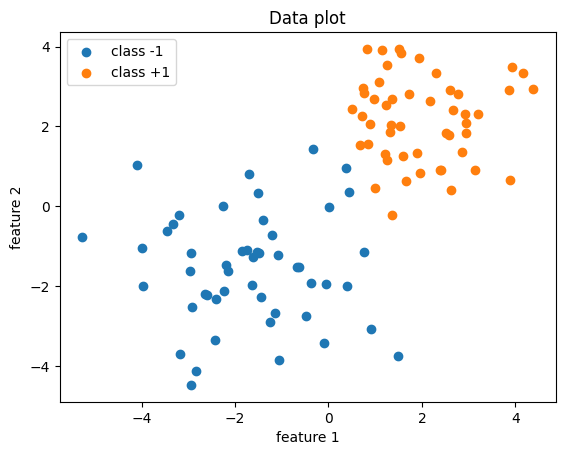

In [5]:
plt.scatter(X[Y == -1, 1], X[Y == -1, 2], label="class -1")
plt.scatter(X[Y == 1, 1], X[Y == 1, 2], label="class +1")
plt.title("Data plot")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

# Perceptrion start

In [6]:
class Perceptron:
    def __init__(self, weights = 3):
        self.weights = weights
        np.random.seed(4)
        self.W = np.random.randn(self.weights)
        self.lr = 2e-3
    
    def evaluate(self, X: np.ndarray, Y: np.ndarray, debug: bool = False) -> np.ndarray:
        # np.dot is dot-product of vector/matrix. is equals vector/matrix multify.
        # 1 if np.dot() >= 0 else -1 is equals np.where(x >= 0, 1, -1)
        wsum = [1 if np.dot(X[i], self.W) >= 0 else -1 for i in range(X.shape[0])]
        
        # wrong Y label is stored.
        self.Y = [i for i in range(X.shape[0]) if wsum[i] != Y[i]]

        if debug:
            print(f"{len(X)- len(self.Y)} sample are correctly classified, {len(self.Y)} sample are incorrectly classified")

    def train(self, X: np.ndarray, Y: np.ndarray):
        W = np.zeros(self.W.shape[0])

        for i in self.Y:
            for j in range(self.W.shape[0]):
                W[j] += Y[i] * X[i,j]
        
        self.W += self.lr * W

In [7]:
perceptron = Perceptron()

perceptron.evaluate(X, Y, True)

24 sample are correctly classified, 76 sample are incorrectly classified


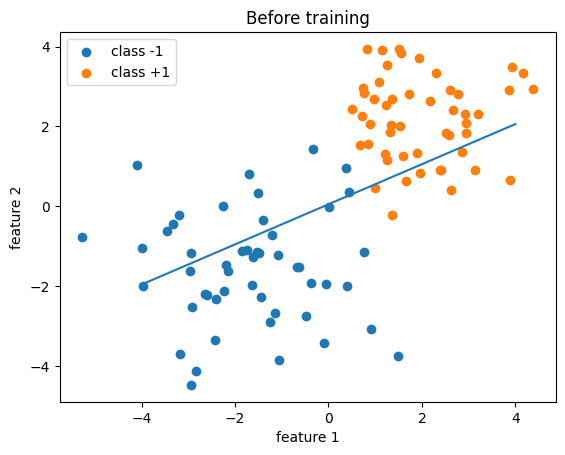

In [8]:
x1_min = -4
x2_min = -(perceptron.W[0] + perceptron.W[1] * x1_min) / perceptron.W[2]
x1_max = 4
x2_max = -(perceptron.W[0] + perceptron.W[1] * x1_max) / perceptron.W[2]

plt.plot([x1_min, x1_max], [x2_min, x2_max])
plt.scatter(X[Y == -1, 1], X[Y == -1, 2], label="class -1")
plt.scatter(X[Y == 1, 1], X[Y == 1, 2], label="class +1")
plt.title('Before training')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [9]:
for i in range(100):
    perceptron.train(X, Y)
    perceptron.evaluate(X, Y, True)

print(perceptron.W)

56 sample are correctly classified, 44 sample are incorrectly classified
73 sample are correctly classified, 27 sample are incorrectly classified
84 sample are correctly classified, 16 sample are incorrectly classified
87 sample are correctly classified, 13 sample are incorrectly classified
91 sample are correctly classified, 9 sample are incorrectly classified
91 sample are correctly classified, 9 sample are incorrectly classified
91 sample are correctly classified, 9 sample are incorrectly classified
92 sample are correctly classified, 8 sample are incorrectly classified
94 sample are correctly classified, 6 sample are incorrectly classified
94 sample are correctly classified, 6 sample are incorrectly classified
94 sample are correctly classified, 6 sample are incorrectly classified
94 sample are correctly classified, 6 sample are incorrectly classified
94 sample are correctly classified, 6 sample are incorrectly classified
94 sample are correctly classified, 6 sample are incorrectly

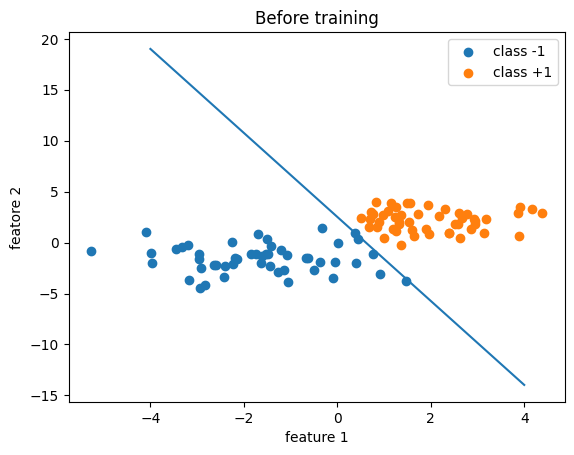

In [10]:
x1_min = -4
x2_min = -(perceptron.W[0] + perceptron.W[1] * x1_min) / perceptron.W[2]
x1_max = 4
x2_max = -(perceptron.W[0] + perceptron.W[1] * x1_max) / perceptron.W[2]

plt.plot([x1_min, x1_max], [x2_min, x2_max])
plt.scatter(X[Y == -1, 1], X[Y == -1, 2], label="class -1")
plt.scatter(X[Y == 1, 1], X[Y == 1, 2], label="class +1")
plt.title('Before training')
plt.xlabel('feature 1')
plt.ylabel('featore 2')
plt.legend()
plt.show()

In [11]:
data = np.loadtxt('perceptron_toydata.txt')
X, Y = data[:, :2], data[:, 2]
X = np.insert(X, obj=0, values=1, axis=1)
Y = (Y - 0.5) * 2

In [12]:
class PerceptronVectorized:
    def __init__(self, weights = 3):
        self.weights = weights
        np.random.seed(4)
        self.W = np.random.randn(self.weights)
        self.lr = 2e-3
    
    def evaluate(self, X: np.ndarray, Y: np.ndarray, debug: bool = False) -> np.ndarray:
        # np.dot is dot-product of vector/matrix. is equals vector/matrix multify.
        # wsum = [1 if np.dot(X[i], self.W) >= 0 else -1 for i in range(X.shape[0])]
        # self.Y = [i for i in range(X.shape[0]) if wsum[i] != Y[i]]

        w_sum = np.dot(X, self.W)
        # np.where is 
        y_pred = np.where(w_sum >= 0, 1, -1)

        if debug:
            print(f"{len(X) - np.sum([y_pred != Y])} sample are correctly classified, {np.sum([y_pred != Y])} samples are incorrectly classified")

    def train(self, X: np.ndarray, Y: np.ndarray):
        W = np.einsum('i,ij->j', Y, X)
        # W[j] += Y[i] * X[i,j]
        
        self.W += self.lr * W

24 sample are correctly classified, 76 samples are incorrectly classified


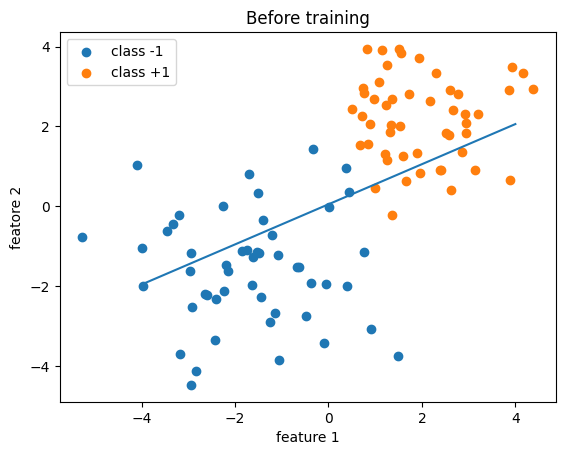

In [13]:
perceptron2 = PerceptronVectorized()
perceptron2.evaluate(X, Y, True)

x1_min = -4
x2_min = -(perceptron2.W[0] + perceptron2.W[1] * x1_min) / perceptron2.W[2]
x1_max = 4
x2_max = -(perceptron2.W[0] + perceptron2.W[1] * x1_max) / perceptron2.W[2]

plt.plot([x1_min, x1_max], [x2_min, x2_max])
plt.scatter(X[Y == -1, 1], X[Y == -1, 2], label="class -1")
plt.scatter(X[Y == 1, 1], X[Y == 1, 2], label="class +1")
plt.title('Before training')
plt.xlabel('feature 1')
plt.ylabel('featore 2')
plt.legend()
plt.show()

61 sample are correctly classified, 39 samples are incorrectly classified
89 sample are correctly classified, 11 samples are incorrectly classified
93 sample are correctly classified, 7 samples are incorrectly classified
93 sample are correctly classified, 7 samples are incorrectly classified
94 sample are correctly classified, 6 samples are incorrectly classified
95 sample are correctly classified, 5 samples are incorrectly classified
95 sample are correctly classified, 5 samples are incorrectly classified
95 sample are correctly classified, 5 samples are incorrectly classified
95 sample are correctly classified, 5 samples are incorrectly classified
95 sample are correctly classified, 5 samples are incorrectly classified
96 sample are correctly classified, 4 samples are incorrectly classified
96 sample are correctly classified, 4 samples are incorrectly classified
96 sample are correctly classified, 4 samples are incorrectly classified
96 sample are correctly classified, 4 samples are

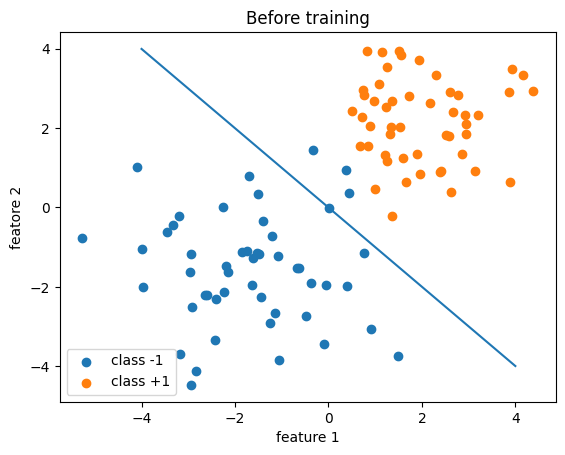

In [14]:
for i in range(200):
    perceptron2.train(X, Y)
    perceptron2.evaluate(X, Y, True)

print(perceptron2.W)

x1_min = -4
x2_min = -(perceptron2.W[0] + perceptron2.W[1] * x1_min) / perceptron2.W[2]
x1_max = 4
x2_max = -(perceptron2.W[0] + perceptron2.W[1] * x1_max) / perceptron2.W[2]

plt.plot([x1_min, x1_max], [x2_min, x2_max])
plt.scatter(X[Y == -1, 1], X[Y == -1, 2], label="class -1")
plt.scatter(X[Y == 1, 1], X[Y == 1, 2], label="class +1")
plt.title('Before training')
plt.xlabel('feature 1')
plt.ylabel('featore 2')
plt.legend()
plt.show()